In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/balajisrinivas/Gender-Detection.git

Cloning into 'Gender-Detection'...
remote: Enumerating objects: 2312, done.
remote: Total 2312 (delta 0), reused 0 (delta 0), pack-reused 2312
Receiving objects: 100% (2312/2312), 160.66 MiB | 28.62 MiB/s, done.
Updating files: 100% (2311/2311), done.


In [ ]:
import os
os.chdir('/content/Gender-Detection')

In [ ]:
!pip install cvlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=a9f8f11d5a92843ed15abc5905266a0c78c813ed5c28435a926c9413dc3d5a99
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=2ba2dac64cfe944423841c753669747cc6a34b7231101687bd66c63f2a5fe3c6
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [ ]:
!ls -lh

total 100M
-rw-r--r-- 1 root root 2.0K Jun 26 05:49 detect_gender_webcam.py
drwxr-xr-x 4 root root 4.0K Jun 26 05:49 gender_dataset_face
-rw-r--r-- 1 root root 100M Jun 26 05:49 gender_detection.model
-rw-r--r-- 1 root root  58K Jun 26 05:49 plot.png
-rw-r--r-- 1 root root 4.6K Jun 26 05:49 train.py


In [ ]:
model = load_model('gender_detection.model')


In [ ]:
# model.summary()

In [ ]:
classes = ['BOY','GIRL']

In [ ]:
!pwd

/content/Gender-Detection


In [ ]:
frame=cv2.imread('/content/drive/MyDrive/Colab Notebooks/test_img.jpg', cv2.IMREAD_COLOR)

In [ ]:
frame.shape

(1080, 876, 3)

In [ ]:
face, confidence = cv.detect_face(frame)

In [ ]:
face

[[232, 144, 724, 847], [524, 508, 1023, 1200]]

In [ ]:
# loop through detected faces
for idx, f in enumerate(face):

    # get corner points of face rectangle
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(frame[startY:endY,startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

1/1 [==============================] - 0s 32ms/step


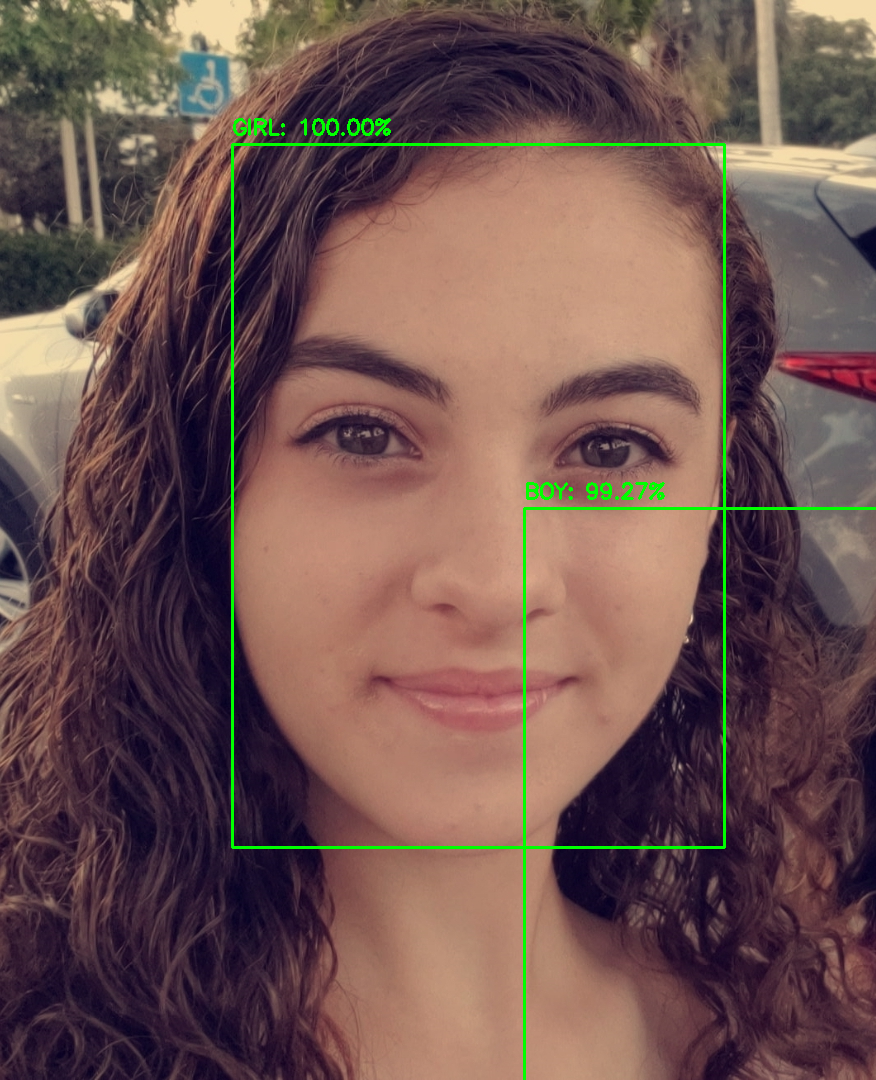

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

